In [40]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.svm import SVC
import seaborn as sns

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/sample_data/car_evaluation.csv", header=None) # index_col = 0 은 index를 제거하는 것
df.columns = ["price", "maint", "door", "persons", "lug_capacity", "safety", "class"]
df

,price,maint,door,persons,lug_capacity,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [13]:
df.columns

Index(['price', 'maint', 'door', 'persons', 'lug_capacity', 'safety', 'class'], dtype='object')

In [14]:
df.isnull().sum()

,0
price,0
maint,0
door,0
persons,0
lug_capacity,0
safety,0
class,0


In [15]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [24]:
Survived_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    Survived_encoders[col] = le

print("변환 후 class 분포:")
print(df['class'].value_counts())

변환 후 class 분포:
class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


In [25]:
df

,price,maint,door,persons,lug_capacity,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [31]:
# Feature와 Target 설정
X = df.drop(columns=['class'])  # feature
y = df['class'] # target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# 데이터 표준화 (Logistic Regression 및 SVM에 유용)
scaler = StandardScaler() # x의 값을 0과 1로 변형
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  #y는 당연히 정답값만 있으니 하나만 있음.

((1382, 6), (346, 6), (1382,), (346,))

In [37]:
# 모델 리스트
models = {
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

In [38]:
# 모델 학습
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

RandomForest Accuracy: 0.9653
RandomForest Confusion Matrix:
[[ 73   8   2   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        83
           1       0.56      0.91      0.69        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.88      0.93      0.89       346
weighted avg       0.97      0.97      0.97       346




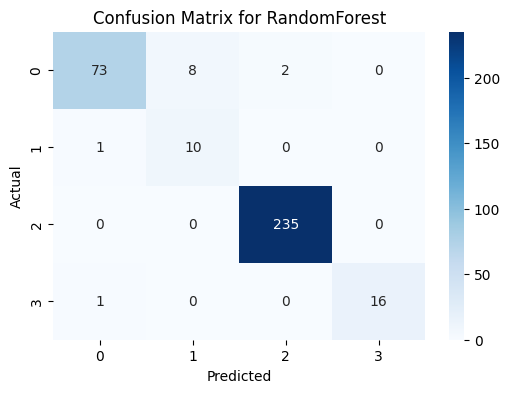

DecisionTree Accuracy: 0.9682
DecisionTree Confusion Matrix:
[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]

DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346




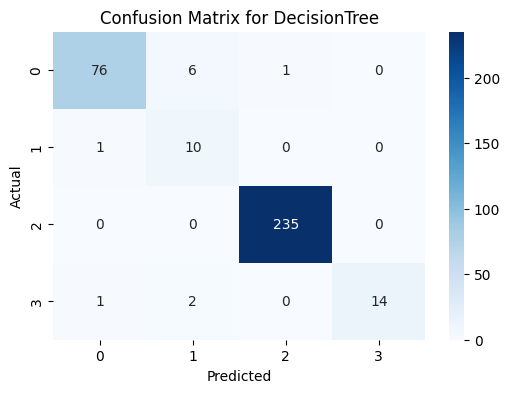

LogisticRegression Accuracy: 0.6590
LogisticRegression Confusion Matrix:
[[ 11   0  69   3]
 [  2   0   9   0]
 [ 17   0 217   1]
 [ 12   0   5   0]]

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346




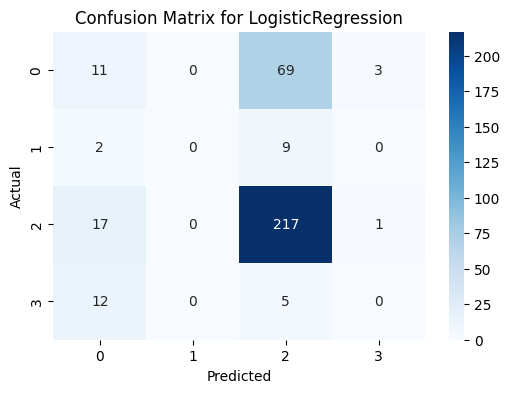

KNN Accuracy: 0.9422
KNN Confusion Matrix:
[[ 74   0   8   1]
 [  4   7   0   0]
 [  1   0 234   0]
 [  6   0   0  11]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        83
           1       1.00      0.64      0.78        11
           2       0.97      1.00      0.98       235
           3       0.92      0.65      0.76        17

    accuracy                           0.94       346
   macro avg       0.94      0.79      0.85       346
weighted avg       0.94      0.94      0.94       346




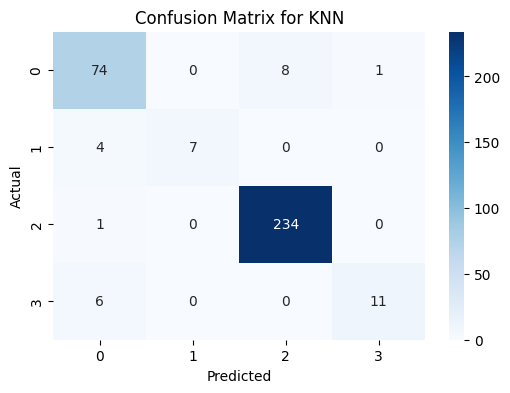

SVM Accuracy: 0.9017
SVM Confusion Matrix:
[[ 68   5  10   0]
 [  6   4   0   1]
 [ 10   0 225   0]
 [  2   0   0  15]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        83
           1       0.44      0.36      0.40        11
           2       0.96      0.96      0.96       235
           3       0.94      0.88      0.91        17

    accuracy                           0.90       346
   macro avg       0.78      0.76      0.77       346
weighted avg       0.90      0.90      0.90       346




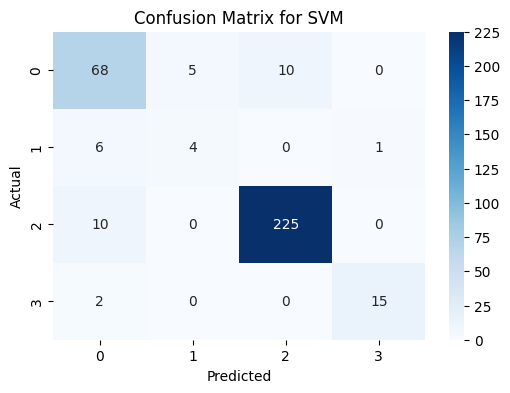

In [41]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Confusion Matrix:\n{cm}\n")
    print(f"{name} Classification Report:\n{report}\n")

    # Confusion Matrix 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()